In [1]:
import pandas as pd
import plotly.express as px
import sqlite3

df = pd.read_csv('Financials.csv')
df.drop_duplicates(inplace=True)
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",1/6/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",1/6/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",1/6/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",1/3/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",1/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",1/2/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,1/4/2014,4,April,2014


In [2]:
df.info

<bound method DataFrame.info of               Segment                   Country     Product   Discount Band   \
0          Government                    Canada   Carretera            None    
1          Government                   Germany   Carretera            None    
2           Midmarket                    France   Carretera            None    
3           Midmarket                   Germany   Carretera            None    
4           Midmarket                    Mexico   Carretera            None    
..                ...                       ...          ...             ...   
695    Small Business                    France    Amarilla            High    
696    Small Business                    Mexico    Amarilla            High    
697        Government                    Mexico     Montana            High    
698        Government                    Canada       Paseo            High    
699  Channel Partners  United States of America         VTT            High    

     Un

In [3]:
print(df.columns.tolist())

['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number', ' Month Name ', 'Year']


In [4]:
# Remove spaces
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [5]:
df['Discount Band'].describe()

count        700
unique         4
top        High 
freq         245
Name: Discount Band, dtype: object

In [6]:
print(df['Discount Band'].unique())


[' None ' ' Low ' ' Medium ' ' High ']


In [7]:
df['Discount Band'] = df['Discount Band'].str.strip()
print(df['Discount Band'].unique())

['None' 'Low' 'Medium' 'High']


In [8]:
# Displaying in descending order by Discount Band
conn = sqlite3.connect(':memory:')
df.to_sql('Financials', conn)

query = """
SELECT *
FROM Financials
ORDER BY 
  CASE "Discount Band"
    WHEN 'High' THEN 1
    WHEN 'Medium' THEN 2
    WHEN 'Low' THEN 3
    WHEN 'None' THEN 4
    ELSE 0
  END
"""
df_new = pd.read_sql_query(query, conn)
df_new

,index,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,455,Channel Partners,United States of America,Carretera,High,$386.00,$3.00,$12.00,"$4,632.00",$463.20,"$4,168.80","$1,158.00","$3,010.80",1/10/2013,10,October,2013
1,456,Government,United States of America,Montana,High,"$2,328.00",$5.00,$7.00,"$16,296.00","$1,629.60","$14,666.40","$11,640.00","$3,026.40",1/9/2014,9,September,2014
2,457,Channel Partners,United States of America,Paseo,High,$386.00,$10.00,$12.00,"$4,632.00",$463.20,"$4,168.80","$1,158.00","$3,010.80",1/10/2013,10,October,2013
3,458,Enterprise,United States of America,Carretera,High,"$3,445.50",$3.00,$125.00,"$4,30,687.50","$43,068.75","$3,87,618.75","$4,13,460.00","($25,841.25)",1/4/2014,4,April,2014
4,459,Enterprise,France,Carretera,High,"$1,482.00",$3.00,$125.00,"$1,85,250.00","$18,525.00","$1,66,725.00","$1,77,840.00","($11,115.00)",1/12/2013,12,December,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,48,Government,France,Amarilla,None,"$1,899.00",$260.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",1/6/2014,6,June,2014
696,49,Government,Germany,Amarilla,None,"$1,686.00",$260.00,$7.00,"$11,802.00",$-,"$11,802.00","$8,430.00","$3,372.00",1/7/2014,7,July,2014
697,50,Channel Partners,United States of America,Amarilla,None,"$2,141.00",$260.00,$12.00,"$25,692.00",$-,"$25,692.00","$6,423.00","$19,269.00",1/8/2014,8,August,2014
698,51,Government,United States of America,Amarilla,None,"$1,143.00",$260.00,$7.00,"$8,001.00",$-,"$8,001.00","$5,715.00","$2,286.00",1/10/2014,10,October,2014


In [9]:
# Checking data types

print(df[['Profit', 'Sales', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS']].dtypes)

Profit                 object
Sales                  object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
COGS                   object
dtype: object


In [10]:
# Checking values

print(df_new['Profit'].unique()[:5])
print(df_new['Sales'].unique()[:5])
print(df_new['Units Sold'].unique()[:5])
print(df_new['Manufacturing Price'].unique()[:5])
print(df_new['Sale Price'].unique()[:5])
print(df_new['Gross Sales'].unique()[:5])
print(df_new['Discounts'].unique()[:5])
print(df_new['COGS'].unique()[:5])

['$3,010.80 ' '$3,026.40 ' '($25,841.25)' '($11,115.00)' ' $1,27,215.00 ']
['$4,168.80 ' '$14,666.40 ' ' $3,87,618.75 ' ' $1,66,725.00 '
 ' $7,28,595.00 ']
['$386.00 ' '$2,328.00 ' '$3,445.50 ' '$1,482.00 ' '$2,313.00 ']
['$3.00 ' '$5.00 ' '$10.00 ' '$120.00 ' '$250.00 ']
['$12.00 ' '$7.00 ' '$125.00 ' '$350.00 ' '$15.00 ']
['$4,632.00 ' '$16,296.00 ' ' $4,30,687.50 ' ' $1,85,250.00 '
 ' $8,09,550.00 ']
['$463.20 ' '$1,629.60 ' '$43,068.75 ' '$18,525.00 ' '$80,955.00 ']
['$1,158.00 ' '$11,640.00 ' ' $4,13,460.00 ' ' $1,77,840.00 '
 ' $6,01,380.00 ']


In [11]:
# Eliminating characters that disturbs our datas

df_new['Sales'] = df_new['Sales'].str.strip()
df_new['Profit'] = df_new['Profit'].str.strip()
df_new['Units Sold'] = df_new['Units Sold'].str.strip()
df_new['Manufacturing Price'] = df_new['Manufacturing Price'].str.strip()
df_new['Sale Price'] = df_new['Sale Price'].str.strip()
df_new['Gross Sales'] = df_new['Gross Sales'].str.strip()
df_new['Discounts'] = df_new['Discounts'].str.strip()
df_new['COGS'] = df_new['COGS'].str.strip()

print(df_new['Sales'].unique()[:5])
print(df_new['Profit'].unique()[:5])
print(df_new['Units Sold'].unique()[:5])
print(df_new['Manufacturing Price'].unique()[:5])
print(df_new['Sale Price'].unique()[:5])
print(df_new['Gross Sales'].unique()[:5])
print(df_new['Discounts'].unique()[:5])
print(df_new['COGS'].unique()[:5])

['$4,168.80' '$14,666.40' '$3,87,618.75' '$1,66,725.00' '$7,28,595.00']
['$3,010.80' '$3,026.40' '($25,841.25)' '($11,115.00)' '$1,27,215.00']
['$386.00' '$2,328.00' '$3,445.50' '$1,482.00' '$2,313.00']
['$3.00' '$5.00' '$10.00' '$120.00' '$250.00']
['$12.00' '$7.00' '$125.00' '$350.00' '$15.00']
['$4,632.00' '$16,296.00' '$4,30,687.50' '$1,85,250.00' '$8,09,550.00']
['$463.20' '$1,629.60' '$43,068.75' '$18,525.00' '$80,955.00']
['$1,158.00' '$11,640.00' '$4,13,460.00' '$1,77,840.00' '$6,01,380.00']


In [12]:
# verifying the data again

df_clean = df_new.copy()

for col in ['Sales', 'Profit', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS']:
    df_clean[col] = df_clean[col].str.replace(r'[\$,]', '', regex=True).str.strip()
    df_clean[col] = df_clean[col].str.replace(r'\((.*?)\)', r'-\1', regex=True).str.strip()
    
print(df_clean['Sales'].unique()[:5])
print(df_clean['Profit'].unique()[:5])
print(df_clean['Units Sold'].unique()[:5])
print(df_clean['Manufacturing Price'].unique()[:5])
print(df_clean['Sale Price'].unique()[:5])
print(df_clean['Gross Sales'].unique()[:5])
print(df_clean['Discounts'].unique()[:5])
print(df_clean['COGS'].unique()[:5])

['4168.80' '14666.40' '387618.75' '166725.00' '728595.00']
['3010.80' '3026.40' '-25841.25' '-11115.00' '127215.00']
['386.00' '2328.00' '3445.50' '1482.00' '2313.00']
['3.00' '5.00' '10.00' '120.00' '250.00']
['12.00' '7.00' '125.00' '350.00' '15.00']
['4632.00' '16296.00' '430687.50' '185250.00' '809550.00']
['463.20' '1629.60' '43068.75' '18525.00' '80955.00']
['1158.00' '11640.00' '413460.00' '177840.00' '601380.00']


In [13]:
# converting strings into numbers

for col in ['Sales', 'Profit', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
print(df_clean[['Sales', 'Profit', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS']].dtypes)
df_clean

Sales                  float64
Profit                 float64
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
COGS                   float64
dtype: object


,index,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,455,Channel Partners,United States of America,Carretera,High,386.0,3.0,12.0,4632.0,463.20,4168.80,1158.0,3010.80,1/10/2013,10,October,2013
1,456,Government,United States of America,Montana,High,2328.0,5.0,7.0,16296.0,1629.60,14666.40,11640.0,3026.40,1/9/2014,9,September,2014
2,457,Channel Partners,United States of America,Paseo,High,386.0,10.0,12.0,4632.0,463.20,4168.80,1158.0,3010.80,1/10/2013,10,October,2013
3,458,Enterprise,United States of America,Carretera,High,3445.5,3.0,125.0,430687.5,43068.75,387618.75,413460.0,-25841.25,1/4/2014,4,April,2014
4,459,Enterprise,France,Carretera,High,1482.0,3.0,125.0,185250.0,18525.00,166725.00,177840.0,-11115.00,1/12/2013,12,December,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,48,Government,France,Amarilla,None,1899.0,260.0,20.0,37980.0,NaN,37980.00,18990.0,18990.00,1/6/2014,6,June,2014
696,49,Government,Germany,Amarilla,None,1686.0,260.0,7.0,11802.0,NaN,11802.00,8430.0,3372.00,1/7/2014,7,July,2014
697,50,Channel Partners,United States of America,Amarilla,None,2141.0,260.0,12.0,25692.0,NaN,25692.00,6423.0,19269.00,1/8/2014,8,August,2014
698,51,Government,United States of America,Amarilla,None,1143.0,260.0,7.0,8001.0,NaN,8001.00,5715.0,2286.00,1/10/2014,10,October,2014


In [14]:
df_clean['Date'].describe()

count           700
unique           16
top       1/10/2013
freq             70
Name: Date, dtype: object

In [15]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True, errors='coerce')
df_clean['Date']

0     2013-10-01
1     2014-09-01
2     2013-10-01
3     2014-04-01
4     2013-12-01
         ...    
695   2014-06-01
696   2014-07-01
697   2014-08-01
698   2014-10-01
699   2014-12-01
Name: Date, Length: 700, dtype: datetime64[ns]

In [16]:
print(df_clean['Date'].dtype)

datetime64[ns]


In [17]:
print(df_clean[['Profit', 'Sales', 'COGS']].mean())

Profit     24307.485309
Sales     169609.071843
COGS      145475.211429
dtype: float64


In [18]:
# Displaying mean for profit, Sales and COGS for both years, 2013 and 2014

df_clean.to_sql('Sales_Evo', conn, if_exists='replace', index=False)

query2 = """
SELECT
 strftime('%Y', Date) AS Year,
 AVG(Profit) AS MEAN_Profit,
 AVG(Sales) AS MEAN_Sales,
 AVG(COGS) AS MEAN_COGS
FROM
 Sales_Evo
GROUP BY
 Year
ORDER BY
 Year
"""

df_sales_evo = pd.read_sql_query(query2, conn)
print(df_sales_evo)

   Year   MEAN_Profit     MEAN_Sales      MEAN_COGS
0  2013  22162.654343  150944.317200  128781.662857
1  2014  25029.303423  175830.656724  151039.727619


In [19]:
summary_by_year = df_clean.groupby(['Year', 'Discount Band'])['Profit'].agg(['count', 'mean', 'median', 'max', 'min']).reset_index()

print(summary_by_year)


   Year Discount Band  count          mean     median       max       min
0  2013          High     60  12134.729667   7373.750  102850.0 -40617.50
1  2013           Low     43  31652.698372   6802.080  246178.0   1237.50
2  2013        Medium     64  22376.120312  11481.225  143244.0 -11606.25
3  2013          None      8  44655.375000   9484.000  155250.0   1725.00
4  2014          High    185  14382.610595   7225.950  154385.0 -38046.25
5  2014           Low    112  43105.282857  11344.200  262200.0    507.59
6  2014        Medium    178  23300.287303  10951.900  188378.0 -17481.25
7  2014          None     45  30649.155556  13905.000  247500.0   1766.00


In [20]:
query_avg_monthly = """
SELECT
  strftime('%Y-%m', Date) AS YearMonth,
  [Discount Band] AS DiscountBand,
  AVG(Profit) AS Avg_Profit,
  AVG(Sales) AS Avg_Sales,
  AVG(COGS) AS Avg_COGS
FROM Sales_Evo
GROUP BY YearMonth, [Discount Band]
ORDER BY YearMonth ASC, [Discount Band];
"""

df_avg_monthly = pd.read_sql_query(query_avg_monthly, conn)
print(df_avg_monthly)

   YearMonth DiscountBand    Avg_Profit      Avg_Sales       Avg_COGS
0    2013-09         High   4187.438333   68505.605000   64318.166667
1    2013-09          Low  42494.515000  201325.390000  158830.875000
2    2013-09       Medium  16151.887500  106020.387500   89868.500000
3    2013-09         None  59858.333333  259695.000000  199836.666667
4    2013-10         High  11138.058333   81754.475000   70616.416667
..       ...          ...           ...            ...            ...
57   2014-11       Medium  11852.535000   52656.392143   40803.857143
58   2014-12         High   7566.847000   39195.947000   31629.100000
59   2014-12          Low  61950.321111  323922.989000  268167.700000
60   2014-12       Medium  18520.549167  149424.132500  130903.583333
61   2014-12         None  52471.666667  191705.000000  139233.333333

[62 rows x 5 columns]


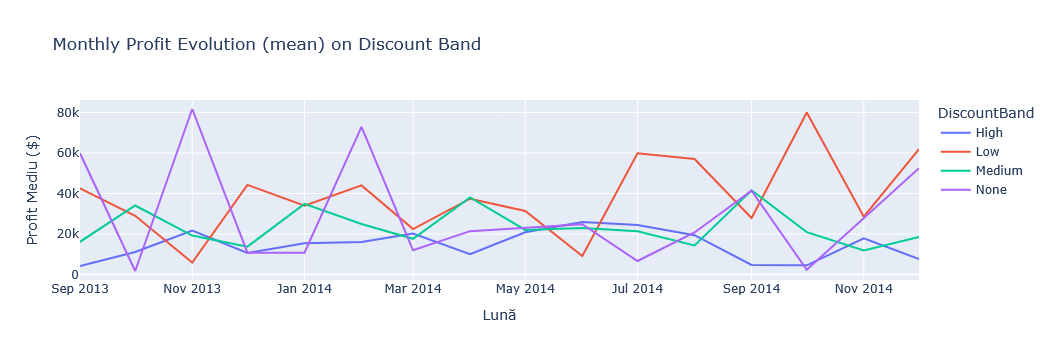

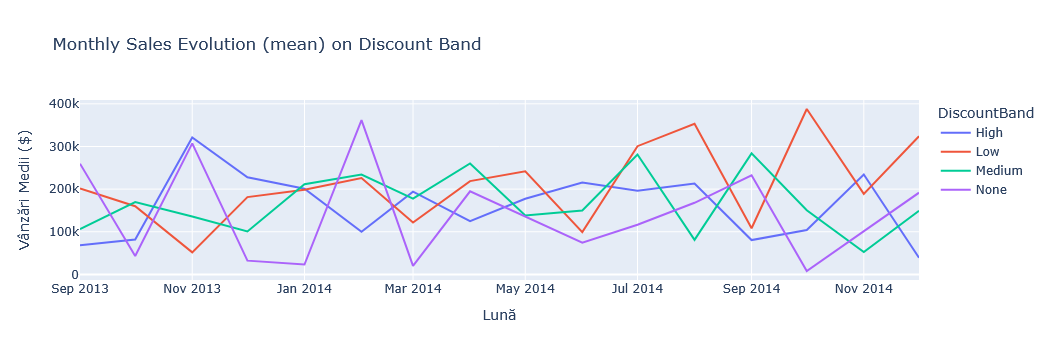

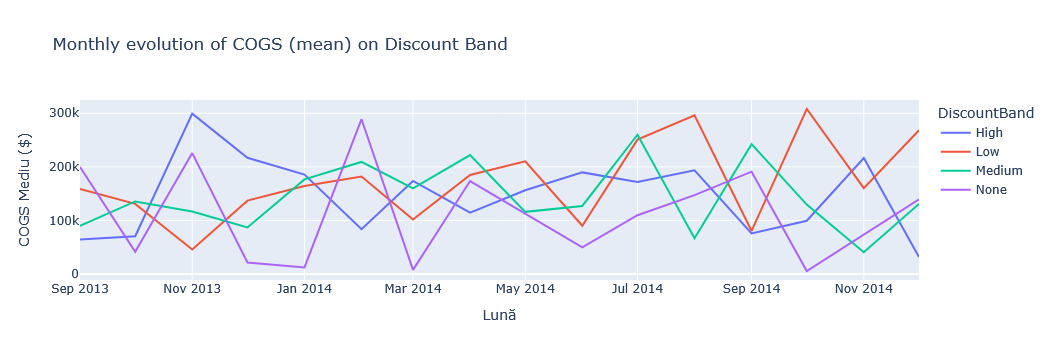

In [21]:
# Displayiny monthly profit, sales and COGS evolution by Discount Band

fig_profit = px.line(
    df_avg_monthly,
    x='YearMonth',
    y='Avg_Profit',
    color='DiscountBand',
    title='Monthly Profit Evolution (mean) on Discount Band',
    labels={'YearMonth': 'Lună', 'Avg_Profit': 'Profit Mediu ($)'}
)
fig_profit.show()

fig_sales = px.line(
    df_avg_monthly,
    x='YearMonth',
    y='Avg_Sales',
    color='DiscountBand',
    title='Monthly Sales Evolution (mean) on Discount Band',
    labels={'YearMonth': 'Lună', 'Avg_Sales': 'Vânzări Medii ($)'}
)
fig_sales.show()

fig_cogs = px.line(
    df_avg_monthly,
    x='YearMonth',
    y='Avg_COGS',
    color='DiscountBand',
    title='Monthly evolution of COGS (mean) on Discount Band',
    labels={'YearMonth': 'Lună', 'Avg_COGS': 'COGS Mediu ($)'}
)
fig_cogs.show()



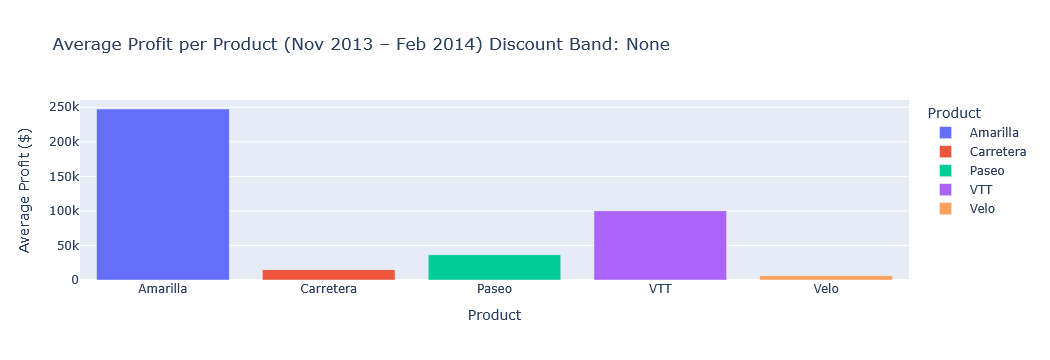

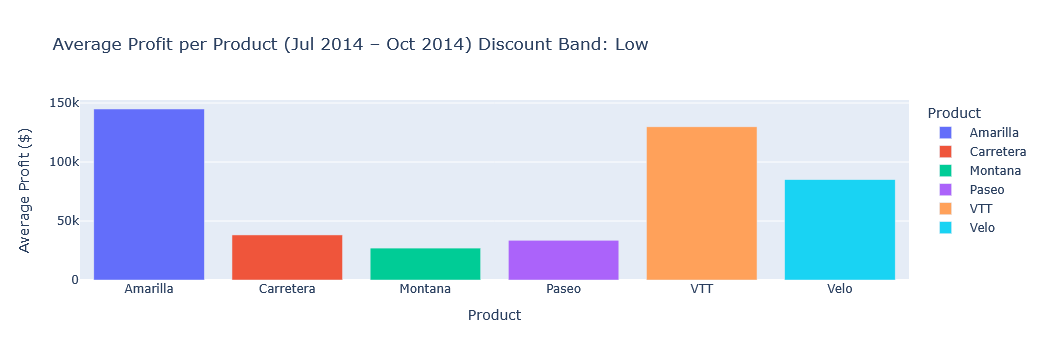

In [22]:
period1 = (df_clean['Date'] >= '2013-11-01') & (df_clean['Date'] <= '2014-02-28') & (df_clean['Discount Band'] == 'None')
df_period1 = df_clean[period1]


period2 = (df_clean['Date'] >= '2014-07-01') & (df_clean['Date'] <= '2014-10-31') & (df_clean['Discount Band'] == 'Low')
df_period2 = df_clean[period2]


df_agg1 = df_period1.groupby('Product')['Profit'].mean().reset_index()
df_agg2 = df_period2.groupby('Product')['Profit'].mean().reset_index()


fig1 = px.bar(
    df_agg1,
    x='Product',
    y='Profit',
    color='Product',
    title='Average Profit per Product (Nov 2013 – Feb 2014)\nDiscount Band: None',
    labels={'Profit': 'Average Profit ($)', 'Product': 'Product'}
)
fig1.show()


fig2 = px.bar(
    df_agg2,
    x='Product',
    y='Profit',
    color='Product',
    title='Average Profit per Product (Jul 2014 – Oct 2014)\nDiscount Band: Low',
    labels={'Profit': 'Average Profit ($)', 'Product': 'Product'}
)
fig2.show()

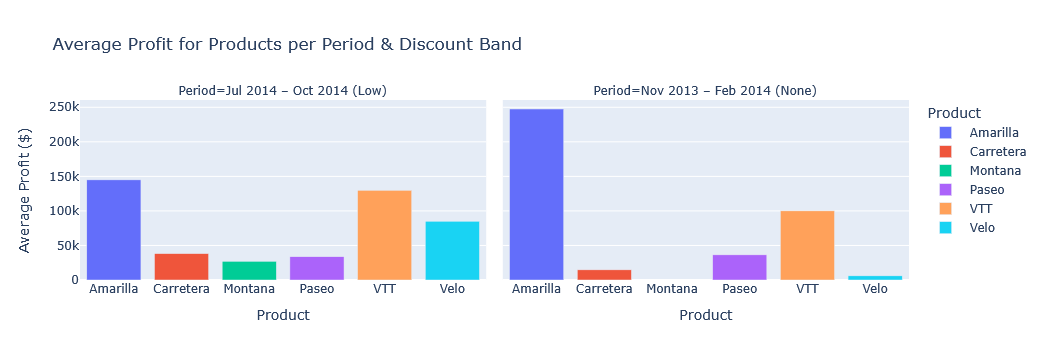

In [23]:
# Creezi copii sigure ale subseturilor
df_period1_copy = df_period1.copy()
df_period2_copy = df_period2.copy()

# Adaugi coloana "Period" fără warning
df_period1_copy['Period'] = 'Nov 2013 – Feb 2014 (None)'
df_period2_copy['Period'] = 'Jul 2014 – Oct 2014 (Low)'

# Concatenare
df_concat = pd.concat([df_period1_copy, df_period2_copy], ignore_index=True)

# Agregare
df_agg = df_concat.groupby(['Period', 'Product'])['Profit'].mean().reset_index()

# Vizualizare
import plotly.express as px

fig = px.bar(
    df_agg,
    x='Product',
    y='Profit',
    color='Product',
    facet_col='Period',
    title="Average Profit for Products per Period & Discount Band",
    labels={'Profit': 'Average Profit ($)', 'Product': 'Product'}
)
fig.show()



In [24]:
df_clean.to_csv('final_sales_analysis.csv', index=False)
